# 0. Machine Learning Basic 개념

## 종류
- 지도학습 : label있는 데이터
- 비지도 학습 : label이 없는 데이터 ( feature는 있지만 고객들의 행동 양식이 있는게 아니어서 고객들을 군집화 하는 경우 )
- 강화 학습
<br>

 </br>
## Decision Tree
- 의사 결정 규칙을 나무구조로 나타내 전체 데이터를 소집단으로 분류 & 예측하는 분석기법
- 불순도가 낮아지는 방향으로 데이터를 분류
- Information gain이 큰 방향으로 분류 변수를 선택
- 어떤 변수로 분류했을 때 각 리프노드에는 같은 결과만 있게끔 만들어줘야함
- 과대적합이 default임. depth를 가지고 과소적합을 유도해 유의미한 결과 도출
<br>

 </br>

### 불순도 
- 1개의 그룹에 종류가 같은 데이터로만 구성되어 있는 경우에는 불순도가 없음
- 불순도가 클 수록 데이터를 분류하기 어려움
- 불순도를 수치화 한 지표 
    - 엔트로피 (Entropy)
    - 지니 계수 (Gini Index)


            

<br> </br>
 
* Information Gain : 분할 전 Entropy와 분할 후 Entropy의 차이


#### ▶ Entropy
- 불순도를 측정하는 지표, 정보량의 기댓값
- 불순한 상태일 수록 Entropy는 큰 값 가짐
- Entropy를 작게 하는 방향으로 Decision Tree 만듬

    #### ID3 ALGORITHM
    - Entropy로 불순도 계산
    - 독립변수가 모두 범주형일때만 가능 
    - 가지고 있는 보든 feature에 대해 분할 후 Information Gain계산하고 이 값이 큰 속성부터 분할 기준으로 삼음


#### ▶ Gini Index
- 불순도를 측정하는 지표, 데이터의 통계적 분산정도를 정량화 해 표현
- Gini Index가 높을 수록 데이터가 분산되어 있음

    #### CART ALGORITHM
    - Gini Index로 불순도 계산
    - Binary Split형태를 따름

## 1. sklearn Library의 iris data 실습 (Decision Tree)

In [6]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from dtreeplt import dtreeplt

C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
irisdata=datasets.load_iris()

In [8]:
# Data Split
X=irisdata.data
y=irisdata.target

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=58)

In [9]:
# 객체 생성 
clf=tree.DecisionTreeClassifier()

In [11]:
# Modeling
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Result
- criterion='gini' : gini index를 기준으로 나눔

In [16]:
# train set의 score
clf.score(X_train,y_train)

1.0

In [15]:
# Test set의 score
clf.score(X_test, y_test)

0.9333333333333333

## Visualization
- 분류 된 과정을 이미지로 보기

In [17]:
dtree=dtreeplt(
    model=clf, 
    feature_names=irisdata.feature_names,
    target_names=irisdata.target_names
)

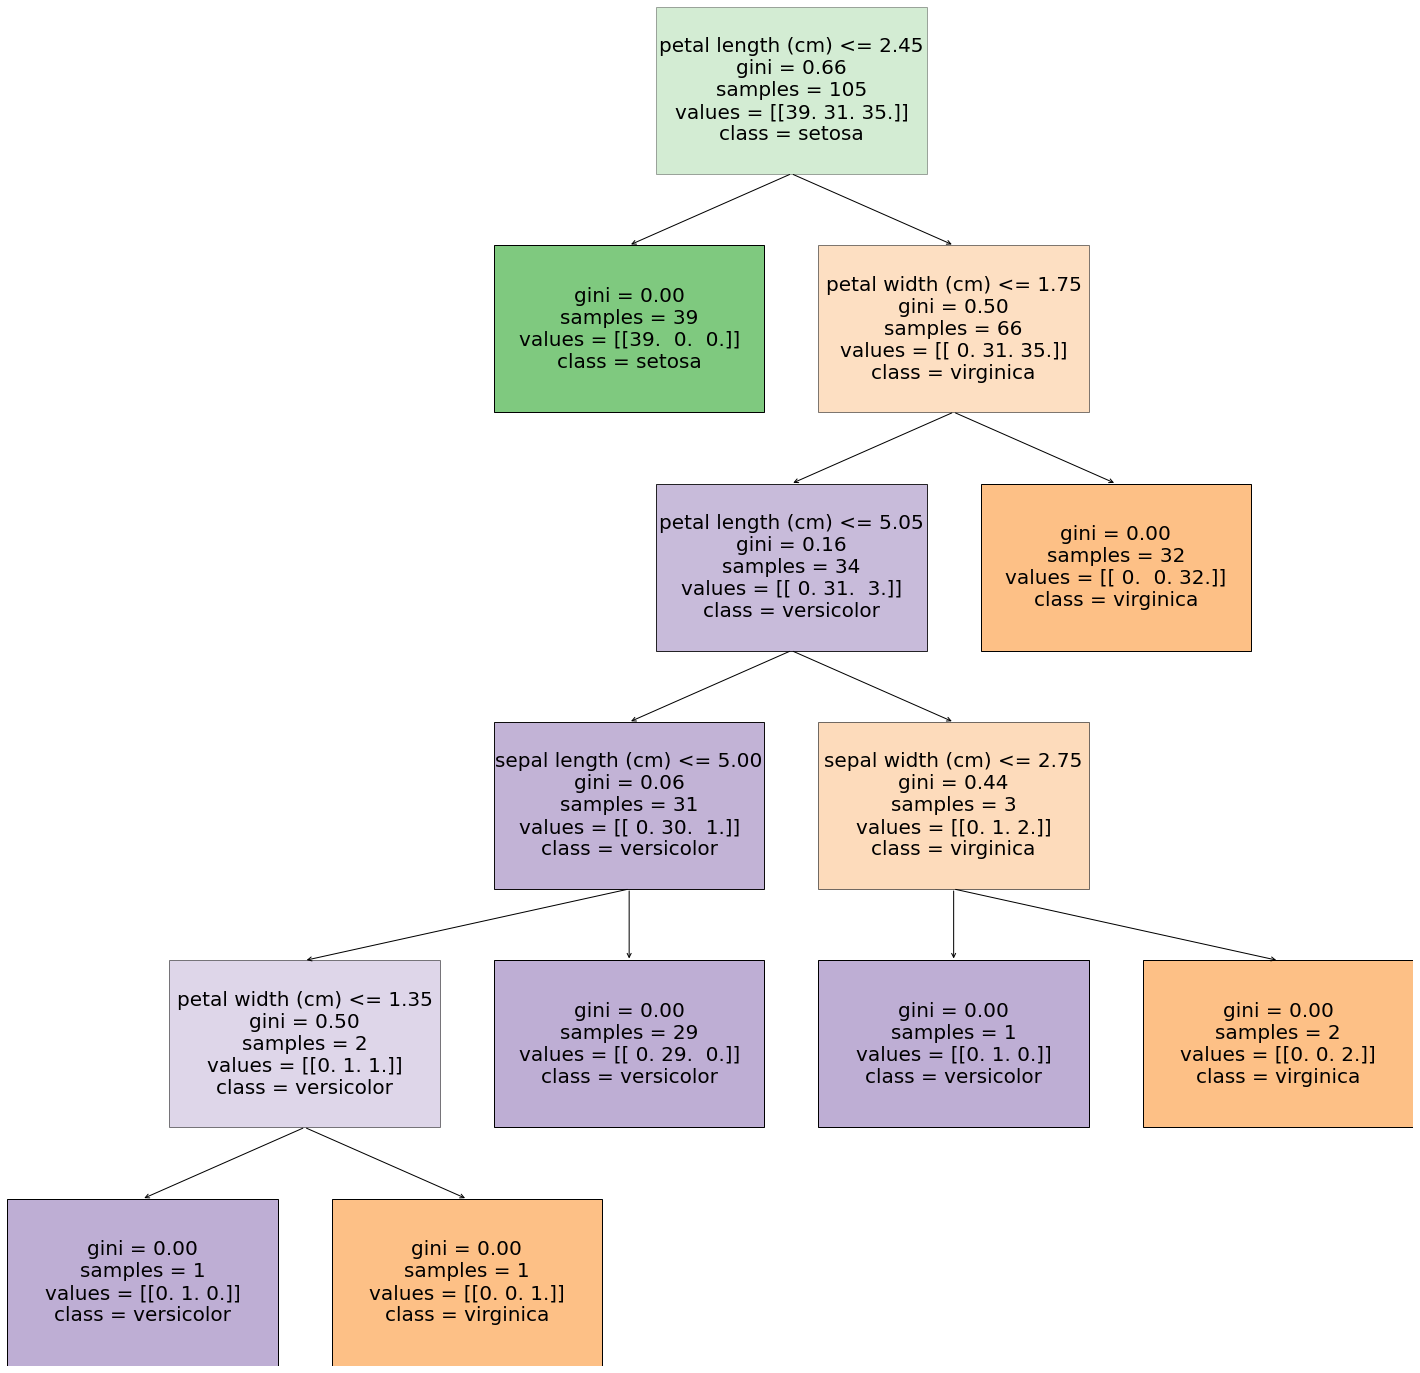

In [18]:
fig=dtree.view()

## Result
- 1개가 남을 때까지 계속 분류함 (leaf node참조)
- gini index : 처음에는 petal width로 분류해야지 gini 값이 제일 좋음
    - 1-(1/3)^2*3
    - gini index=0.5일때 2개가 분류되지 않음. 그래서 그걸 둘로 분류 

In [21]:
fig.savefig('dtree.png') # image 저장

## 사전 가지치기 (prunning)
- 결정 트리의 복잡도 제어 -> 과대 적합의 방지

In [22]:
#객체 생성(depth =3까지만 해줌)
clf1=tree.DecisionTreeClassifier(max_depth=3)

In [23]:
# Modeling
clf1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
clf1.score(X_train,y_train)

0.9809523809523809

In [25]:
clf1.score(X_test,y_test)

0.9555555555555556

## Result
- depth=3으로 설정했더니 정확도가 오히려 높게 나옴을 볼 수 있음
- 과소적합 시키는 방향으로 만들어 주는 것이 더 의미 있음

## 변수 중요도 (Feature Importance ) 
- 0~1사이의 값

In [28]:
## 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

In [29]:
font_name=fm.FontProperties(fname='C:\\WINDOWS\\Fonts\\malgun.TTF')
font_name.get_name()
rc('font',family=font_name.get_name())

In [30]:
clf1.feature_importances_

array([0.        , 0.        , 0.03314601, 0.96685399])

(-1.0, 4.0)

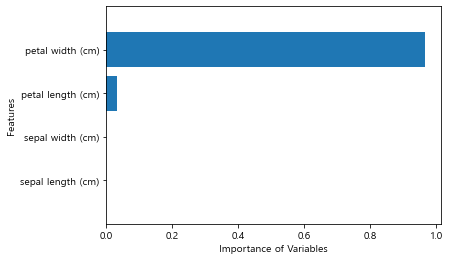

In [33]:
# 그래프로 확인
n_features=irisdata.data.shape[1]
plt.barh(range(n_features), clf1.feature_importances_,align='center')
plt.yticks(np.arange(n_features),irisdata.feature_names)
plt.xlabel('Importance of Variables',)
plt.ylabel('Features')
plt.ylim(-1,n_features)


## Predict

In [34]:
clf1.predict(X_test)

array([1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0,
       1])

In [35]:
# 예측 확률
clf1.predict_proba(X_test)

array([[0.        , 0.96774194, 0.03225806],
       [0.        , 0.96774194, 0.03225806],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96774194, 0.03225806],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96774194, 0.03225806],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96774194, 0.03225806],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96774194, 0.03225806],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96774194, 0.03225806],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96774194, 0.03225806],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.